In [127]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [128]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [129]:
df = pd.read_csv("../Python/Output/InversionNearOne.txt", sep='\t')
df.head()

,Input Uncertainty,Value,Uncertainty,Deviation,Mean,Minimum,Maximum,Less,More,-3.0,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.199987,1.046235,0.249961,0.241561,1.044743,0.578318,3.467193,0,129,0.0,...,0.026441,0.018742,0.013980,0.009523,0.009827,0.004964,0.006382,0.003951,0.003444,0.001722
1,0.199985,1.046234,0.249955,0.248038,1.049241,0.582751,4.014627,0,154,0.0,...,0.024680,0.018485,0.016149,0.011274,0.008735,0.006195,0.005789,0.003758,0.003555,0.001219
2,0.199980,1.046231,0.249940,0.245389,1.043803,0.546383,3.428734,0,135,0.0,...,0.022909,0.020071,0.013178,0.012468,0.008312,0.006589,0.005271,0.004866,0.002838,0.001318
3,0.199950,1.046215,0.249851,0.240997,1.040263,0.520689,3.232093,0,126,0.0,...,0.025420,0.015293,0.015698,0.010938,0.009216,0.006583,0.005266,0.004355,0.003443,0.002026
4,0.199900,1.046187,0.249704,0.243357,1.047411,0.583377,3.434938,0,129,0.0,...,0.026846,0.019552,0.013373,0.011650,0.009422,0.007497,0.005471,0.003850,0.003748,0.001216


In [130]:
df['Input Delta'] = 0.2 - df['Input Uncertainty']

In [131]:
df.columns

Index(['Input Uncertainty', 'Value', 'Uncertainty', 'Deviation', 'Mean',
       'Minimum', 'Maximum', 'Less', 'More', '-3.0', '-2.8', '-2.6', '-2.4',
       '-2.2', '-2.0', '-1.8', '-1.6', '-1.4', '-1.2', '-1.0', '-0.8', '-0.6',
       '-0.4', '-0.2', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4',
       '1.6', '1.8', '2.0', '2.2', '2.4', '2.6', '2.8', '3.0', 'Input Delta'],
      dtype='object')

# Histogram

In [132]:
sHisto = [str(i/10) for i in range(-30, 31, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000507,0.005065,0.019046,0.043359,...,0.026441,0.018742,0.013980,0.009523,0.009827,0.004964,0.006382,0.003951,0.003444,0.001722
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001625,0.005992,0.018789,0.040016,...,0.024680,0.018485,0.016149,0.011274,0.008735,0.006195,0.005789,0.003758,0.003555,0.001219
2,0.0,0.0,0.0,0.0,0.000000,0.000101,0.000608,0.005068,0.020679,0.040547,...,0.022909,0.020071,0.013178,0.012468,0.008312,0.006589,0.005271,0.004866,0.002838,0.001318
3,0.0,0.0,0.0,0.0,0.000101,0.000000,0.001215,0.006178,0.023800,0.045676,...,0.025420,0.015293,0.015698,0.010938,0.009216,0.006583,0.005266,0.004355,0.003443,0.002026
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001013,0.006990,0.019654,0.039611,...,0.026846,0.019552,0.013373,0.011650,0.009422,0.007497,0.005471,0.003850,0.003748,0.001216


In [133]:
def PlotHisto(sInputUncertainty=(0.01, 0.1, 0.1999871)):
    dfPlot = df[df['Input Uncertainty'].isin(sInputUncertainty)].set_index('Input Uncertainty')
    ax = dfPlot[sHisto].T.plot(grid=True, title=r'Histogram for $\frac{1}{1 \pm \delta x}$')
    ax.legend(bbox_to_anchor=(1.0, 1.0))   

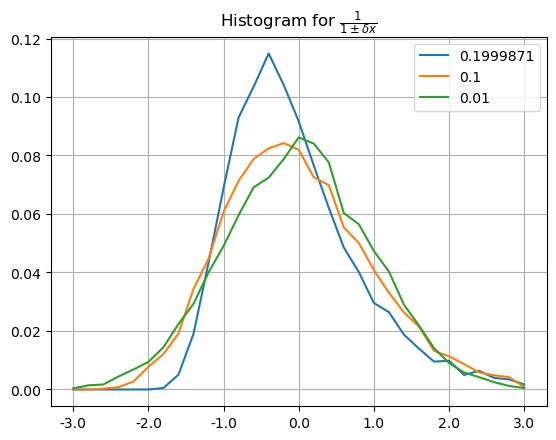

In [134]:
PlotHisto()

In [135]:
df[['Input Delta', 'Mean', 'Value', 'Deviation', 'Uncertainty']].head()

,Input Delta,Mean,Value,Deviation,Uncertainty
0,0.000013,1.044743,1.046235,0.241561,0.249961
1,0.000015,1.049241,1.046234,0.248038,0.249955
2,0.000020,1.043803,1.046231,0.245389,0.249940
3,0.000050,1.040263,1.046215,0.240997,0.249851
4,0.000100,1.047411,1.046187,0.243357,0.249704


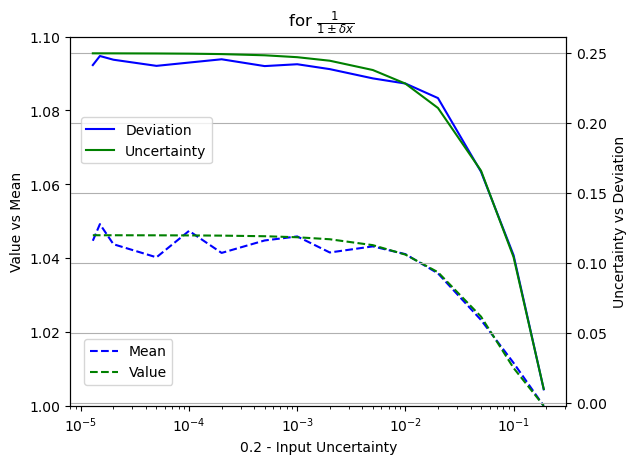

In [136]:
fig, ax = plt.subplots()
ax.set_title(r' for $\frac{1}{1 \pm \delta x}$')
ax.set_xlabel('0.2 - Input Uncertainty')
ax.set_xscale('log')
ax.set_ylabel('Value vs Mean')
ax.set_ylim((1, 1.1))
ax.plot(df['Input Delta'], df['Mean'], f'b--', label='Mean')
ax.plot(df['Input Delta'], df['Value'], f'g--', label='Value')

ax2 = ax.twinx()
ax2.set_ylabel('Uncertainty vs Deviation')
ax2.plot(df['Input Delta'], df['Deviation'], f'b-', label='Deviation')
ax2.plot(df['Input Delta'], df['Uncertainty'], f'g-', label='Uncertainty')

plt.grid(True)
ax.legend(bbox_to_anchor=(0.22, 0.2))
ax2.legend(bbox_to_anchor=(0.3, 0.8))